# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f"q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat=city_weather['coord']['lat']
        city_lng=city_weather['coord']['lon']
        
        city_max_temp =city_weather['main']['temp']
        city_humidity =city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind =city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date =city_weather['timezone']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | padang
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | thinadhoo
Processing Record 7 of Set 1 | saguenay
Processing Record 8 of Set 1 | kotabumi
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | sisimiut
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | atherton
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | piti village
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | egilsstadir
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | eyl
Processing Record 22 of Set 1 | horta
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,21.45,45,0,4.63,US,-14400
1,padang,-0.9492,100.3543,26.03,90,100,1.75,ID,25200
2,stanley,54.8680,-1.6985,9.39,92,40,4.63,GB,3600
3,mount gambier,-37.8333,140.7667,5.50,87,5,1.42,AU,34200
4,iqaluit,63.7506,-68.5145,1.50,100,100,2.57,CA,-14400


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,21.45,45,0,4.63,US,-14400
1,padang,-0.9492,100.3543,26.03,90,100,1.75,ID,25200
2,stanley,54.8680,-1.6985,9.39,92,40,4.63,GB,3600
3,mount gambier,-37.8333,140.7667,5.50,87,5,1.42,AU,34200
4,iqaluit,63.7506,-68.5145,1.50,100,100,2.57,CA,-14400


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

<Figure size 640x480 with 0 Axes>

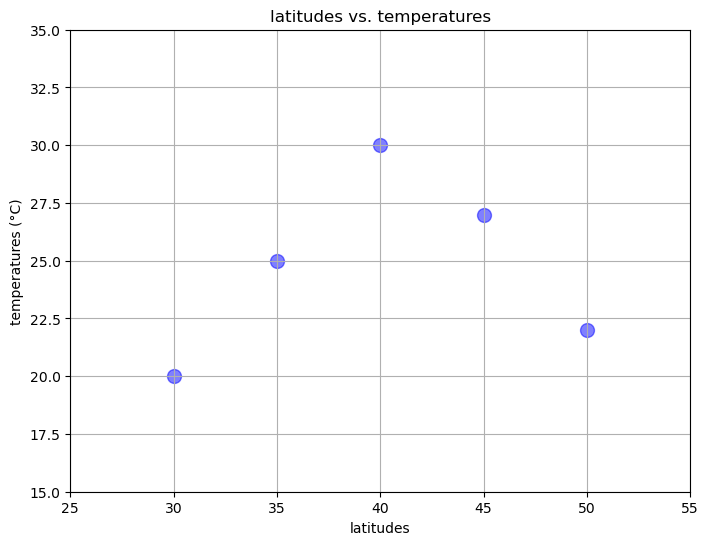

In [8]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
latitudes = [30, 35, 40, 45, 50]
temperatures = [20, 25, 30, 27, 22]


# Incorporate the other graph properties
# YOUR CODE HERE
marker_size = 100
xlim = (25, 55)
ylim = (15, 35)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, temperatures, color='blue', alpha=0.5, s=marker_size)
plt.title('latitudes vs. temperatures')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('latitudes')
plt.ylabel('temperatures (°C)')
plt.grid(True)
plt.show()

#### Latitude Vs. Humidity

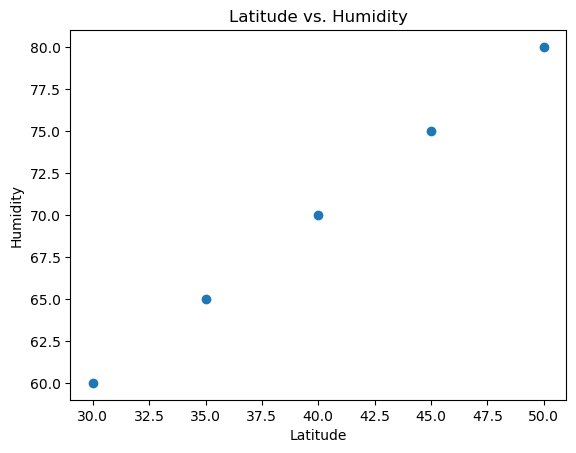

In [9]:


import matplotlib.pyplot as plt

# Incorporate the other graph properties
# YOUR CODE HERE show the code
latitude = [30, 35, 40, 45, 50]
humidity = [60, 65, 70, 75, 80]

# Create scatter plot
plt.scatter(latitude, humidity)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Incorporate the other graph properties
# YOUR CODE HERE
marker_color = 'blue'
marker_size = 100
marker_style = '5'  # '4' for circle marker, '^' for triangle marker, etc.
alpha_value = 0.10   # Opacity of markers
xlim = (25, 55)
ylim = (55, 85)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

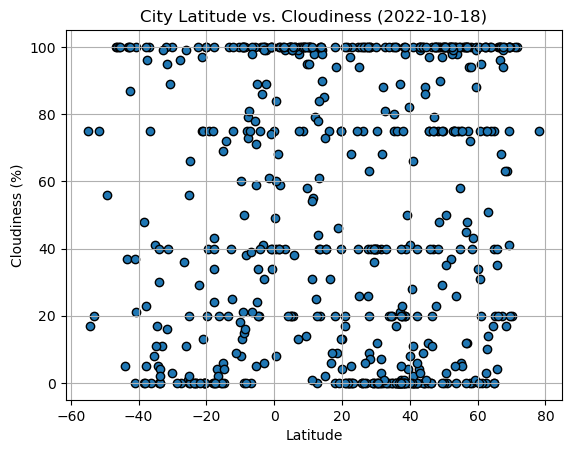

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, edgecolors="black")
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Save the figure
plt.savefig("output_data/Fig3.png")
plt.grid()
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

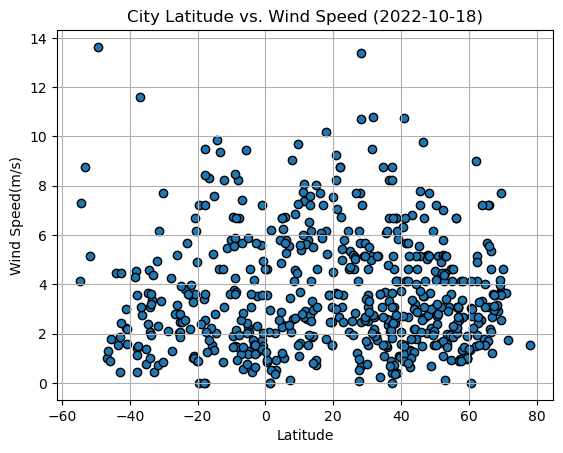

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(latitude, wind_speed, edgecolors="black")
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
# Save the figure
plt.savefig("output_data/Fig4.png")
plt.grid()
# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values, y_values, xlabel, ylabel, coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
   
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,21.45,45,0,4.63,US,-14400
2,stanley,54.8680,-1.6985,9.39,92,40,4.63,GB,3600
4,iqaluit,63.7506,-68.5145,1.50,100,100,2.57,CA,-14400
5,thinadhoo,0.5333,72.9333,28.87,72,8,3.57,MV,18000
6,saguenay,48.4168,-71.0657,13.54,59,75,7.72,CA,-14400


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,padang,-0.9492,100.3543,26.03,90,100,1.75,ID,25200
3,mount gambier,-37.8333,140.7667,5.50,87,5,1.42,AU,34200
7,kotabumi,-4.8333,104.9000,23.90,95,34,1.29,ID,25200
9,blackmans bay,-43.0167,147.3167,7.60,85,100,0.45,AU,36000
11,adamstown,-25.0660,-130.1015,21.20,56,56,2.49,PN,-28800


###  Temperature vs. Latitude Linear Regression Plot

In [15]:


# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,padang,-0.9492,100.3543,26.03,90,100,1.75,ID,25200
3,mount gambier,-37.8333,140.7667,5.50,87,5,1.42,AU,34200
7,kotabumi,-4.8333,104.9000,23.90,95,34,1.29,ID,25200
9,blackmans bay,-43.0167,147.3167,7.60,85,100,0.45,AU,36000
11,adamstown,-25.0660,-130.1015,21.20,56,56,2.49,PN,-28800


The r-squared is: 0.6642031855715834


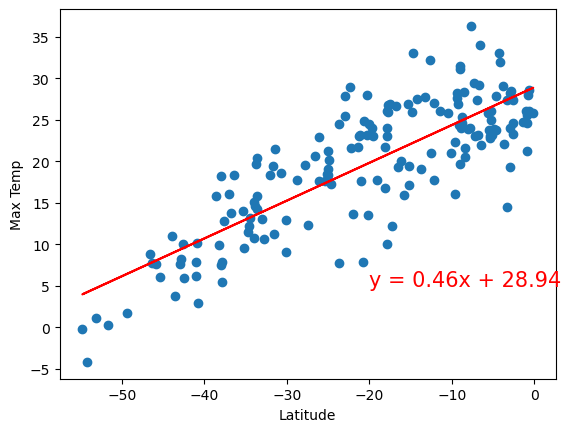

In [16]:

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (-20,5))


The r-squared is: 0.49719929760074194


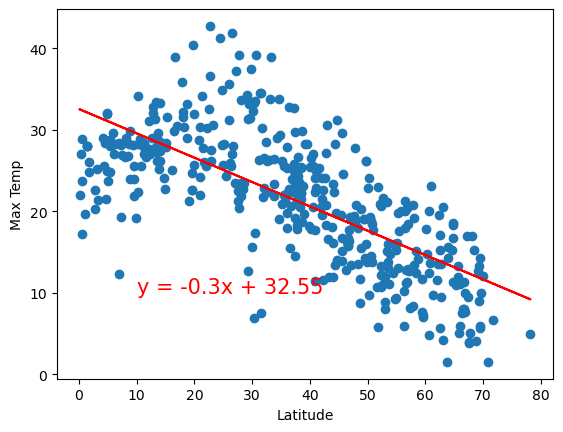

In [17]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (10, 10))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 1.6432186828030092e-05


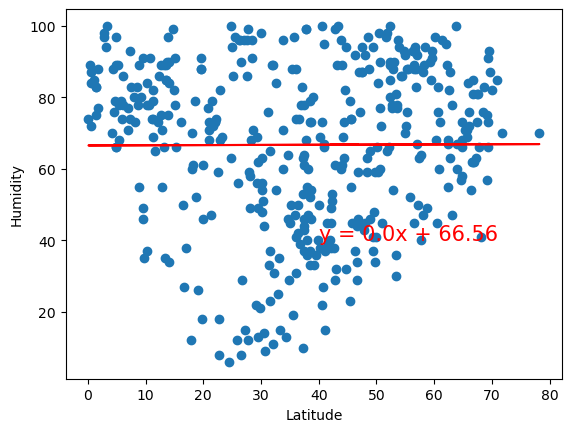

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', (40,40))

The r-squared is: 0.010223062106077055


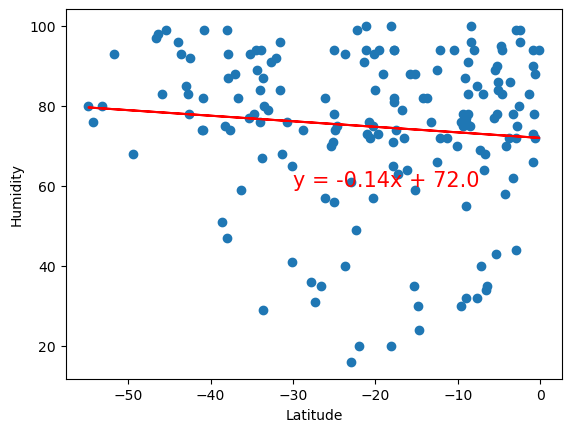

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', (-30,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0001609169197168453


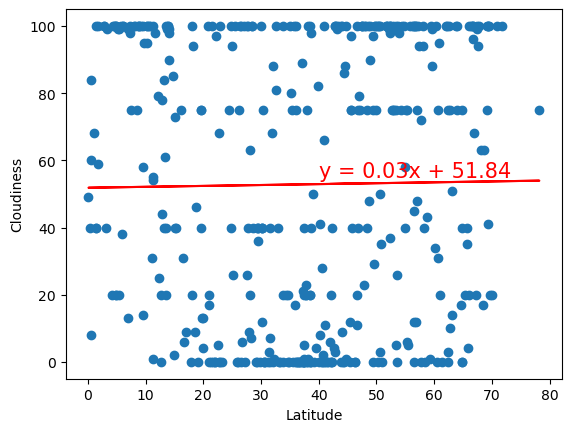

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (40,55))


The r-squared is: 0.010679384585744349


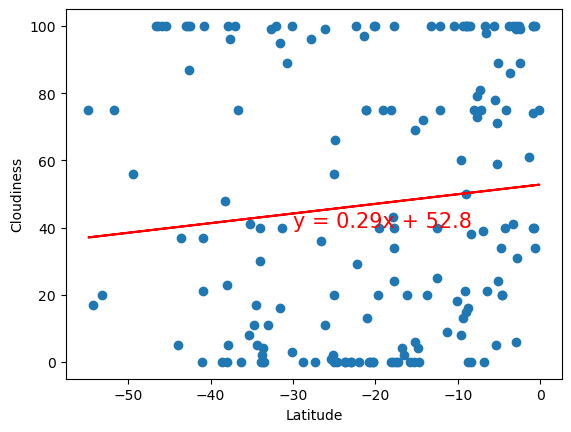

In [21]:
# southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (-30,40))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0149305662122632


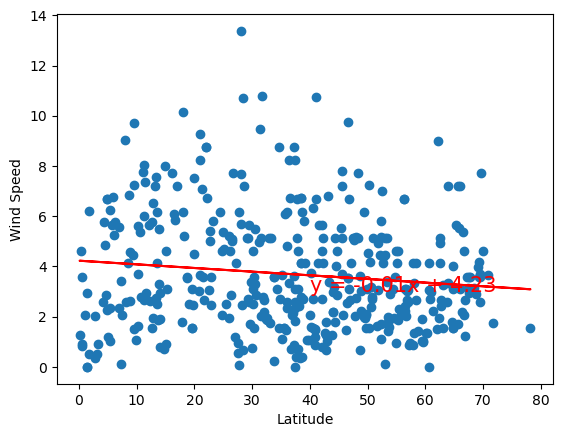

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (40,3))


The r-squared is: 4.848615061632351e-06


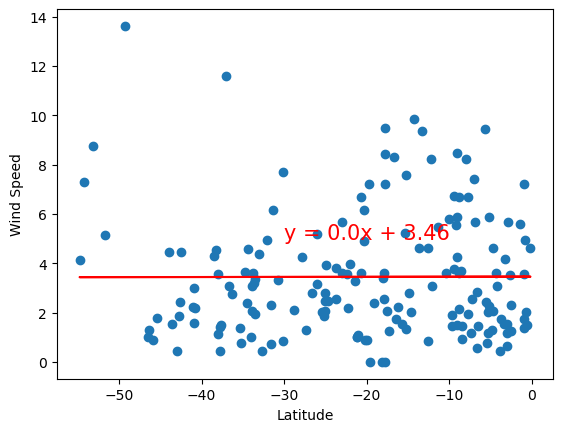

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (-30,5))


**Discussion about the linear relationship:** YOUR RESPONSE HERE